In [1]:
import os
import pandas as pd
import numpy as np
import math
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import cm
from parse import *
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier as RandomForest
import random
from sklearn import linear_model
from datetime import datetime
import gc

pd.set_option("display.max_columns", 2000)


In [2]:
CHUNKSIZE = 100000

TRAIN_DATE        = "train_date.csv"
TRAIN_NUMERIC     = "train_numeric.csv"
TRAIN_CATEGORICAL = "train_categorical.csv"
TEST_DATE         = "test_date.csv"
TEST_NUMERIC      = "test_numeric.csv"
TEST_CATEGORICAL  = "test_categorical.csv"

SEED = 0
CHUNKSIZE = 50000
NROWS = 1200000

ID_COLUMN = 'Id'
TARGET_COLUMN = 'Response'
 

In [4]:
CHUNK_SIZE = 10000

start = datetime.now()

reader_date = pd.read_csv("../train_date.csv",chunksize=CHUNK_SIZE, dtype=np.float32)
reader_cat = pd.read_csv("../output/df_id_response.csv",chunksize=CHUNK_SIZE, dtype=np.float32)


#分割して読み込み
loop = 0
cnt_0 = 0
cnt_1 = 0
for df_chunk_date in reader_date:
    df_chunk_cat = reader_cat.get_chunk(CHUNK_SIZE)
    
    df_chunk = pd.merge(on="Id", left=df_chunk_date, right=df_chunk_cat)
    df_0 = df_chunk[df_chunk['Response'] == 0]
    df_1 = df_chunk[df_chunk['Response'] == 1]
    
    if loop == 0:
        df = pd.concat([df_0, df_1])
    else:
        df = pd.concat([df, df_0, df_1])
    
    print("loop : {} / Rows = {}".format(loop, len(df.index)))

    loop = loop + 1
    
print("0:{}, 1:{}".format(cnt_0, cnt_1))
print("{} -> {}".format(start, datetime.now()))
print("Memory:{}".format(df.memory_usage(index=True).sum()))

loop : 0 / Rows = 10000
loop : 1 / Rows = 20000
loop : 2 / Rows = 30000
loop : 3 / Rows = 40000
loop : 4 / Rows = 50000
loop : 5 / Rows = 60000
loop : 6 / Rows = 70000
loop : 7 / Rows = 80000
loop : 8 / Rows = 90000
loop : 9 / Rows = 100000
loop : 10 / Rows = 110000
loop : 11 / Rows = 120000
loop : 12 / Rows = 130000
loop : 13 / Rows = 140000
loop : 14 / Rows = 150000
loop : 15 / Rows = 160000
loop : 16 / Rows = 170000
loop : 17 / Rows = 180000
loop : 18 / Rows = 190000
loop : 19 / Rows = 200000
loop : 20 / Rows = 210000
loop : 21 / Rows = 220000
loop : 22 / Rows = 230000
loop : 23 / Rows = 240000
loop : 24 / Rows = 250000
loop : 25 / Rows = 260000
loop : 26 / Rows = 270000
loop : 27 / Rows = 280000
loop : 28 / Rows = 290000
loop : 29 / Rows = 300000
loop : 30 / Rows = 310000
loop : 31 / Rows = 320000
loop : 32 / Rows = 330000
loop : 33 / Rows = 340000
loop : 34 / Rows = 350000
loop : 35 / Rows = 360000
loop : 36 / Rows = 370000
loop : 37 / Rows = 380000
loop : 38 / Rows = 390000
loop 

In [5]:
df.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,L0_S1_D26,L0_S1_D30,L0_S2_D34,L0_S2_D38,L0_S2_D42,L0_S2_D46,L0_S2_D50,L0_S2_D54,L0_S2_D58,L0_S2_D62,L0_S2_D66,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,L0_S4_D106,L0_S4_D111,L0_S5_D115,L0_S5_D117,L0_S6_D120,L0_S6_D124,L0_S6_D127,L0_S6_D130,L0_S6_D134,L0_S7_D137,L0_S7_D139,L0_S7_D140,L0_S7_D141,L0_S7_D143,L0_S8_D145,L0_S8_D147,L0_S8_D148,L0_S8_D150,L0_S9_D152,L0_S9_D157,L0_S9_D162,L0_S9_D167,L0_S9_D172,L0_S9_D177,L0_S9_D182,L0_S9_D187,L0_S9_D192,L0_S9_D197,L0_S9_D202,L0_S9_D207,L0_S9_D212,L0_S10_D216,L0_S10_D221,L0_S10_D226,L0_S10_D231,L0_S10_D236,L0_S10_D241,L0_S10_D246,L0_S10_D251,L0_S10_D256,L0_S10_D261,L0_S10_D266,L0_S10_D271,L0_S10_D276,L0_S11_D280,L0_S11_D284,L0_S11_D288,L0_S11_D292,L0_S11_D296,L0_S11_D300,L0_S11_D304,L0_S11_D308,L0_S11_D312,L0_S11_D316,L0_S11_D320,L0_S11_D324,L0_S11_D328,L0_S12_D331,L0_S12_D333,L0_S12_D335,L0_S12_D337,L0_S12_D339,L0_S12_D341,L0_S12_D343,L0_S12_D345,L0_S12_D347,L0_S12_D349,L0_S12_D351,L0_S12_D353,L0_S13_D355,L0_S13_D357,L0_S14_D360,L0_S14_D364,L0_S14_D368,L0_S14_D372,L0_S14_D376,L0_S14_D380,L0_S14_D384,L0_S14_D388,L0_S14_D392,L0_S15_D395,L0_S15_D398,L0_S15_D401,L0_S15_D404,L0_S15_D407,L0_S15_D410,L0_S15_D413,L0_S15_D416,L0_S15_D419,L0_S16_D423,L0_S16_D428,L0_S17_D432,L0_S17_D434,L0_S18_D437,L0_S18_D441,L0_S18_D444,L0_S18_D447,L0_S18_D451,L0_S19_D454,L0_S19_D456,L0_S19_D457,L0_S19_D458,L0_S19_D460,L0_S20_D462,L0_S20_D464,L0_S20_D465,L0_S20_D467,L0_S21_D469,L0_S21_D474,L0_S21_D479,L0_S21_D484,L0_S21_D489,L0_S21_D494,L0_S21_D499,L0_S21_D504,L0_S21_D509,L0_S21_D514,L0_S21_D519,L0_S21_D524,L0_S21_D529,L0_S21_D534,L0_S21_D539,L0_S22_D543,L0_S22_D548,L0_S22_D553,L0_S22_D558,L0_S22_D563,L0_S22_D568,L0_S22_D573,L0_S22_D578,L0_S22_D583,L0_S22_D588,L0_S22_D593,L0_S22_D598,L0_S22_D603,L0_S22_D608,L0_S22_D613,L0_S23_D617,L0_S23_D621,L0_S23_D625,L0_S23_D629,L0_S23_D633,L0_S23_D637,L0_S23_D641,L0_S23_D645,L0_S23_D649,L0_S23_D653,L0_S23_D657,L0_S23_D661,L0_S23_D665,L0_S23_D669,L0_S23_D673,L1_S24_D677,L1_S24_D681,L1_S24_D685,L1_S24_D689,L1_S24_D693,L1_S24_D697,L1_S24_D702,L1_S24_D707,L1_S24_D712,L1_S24_D716,L1_S24_D721,L1_S24_D725,L1_S24_D730,L1_S24_D735,L1_S24_D739,L1_S24_D743,L1_S24_D748,L1_S24_D753,L1_S24_D758,L1_S24_D763,L1_S24_D768,L1_S24_D772,L1_S24_D777,L1_S24_D782,L1_S24_D787,L1_S24_D792,L1_S24_D797,L1_S24_D801,L1_S24_D804,L1_S24_D807,L1_S24_D809,L1_S24_D811,L1_S24_D813,L1_S24_D815,L1_S24_D818,L1_S24_D822,L1_S24_D826,L1_S24_D831,L1_S24_D836,L1_S24_D841,L1_S24_D846,L1_S24_D850,L1_S24_D854,L1_S24_D859,L1_S24_D864,L1_S24_D869,L1_S24_D874,L1_S24_D879,L1_S24_D884,L1_S24_D889,L1_S24_D894,L1_S24_D899,L1_S24_D904,L1_S24_D909,L1_S24_D913,L1_S24_D917,L1_S24_D922,L1_S24_D927,L1_S24_D932,L1_S24_D937,L1_S24_D941,L1_S24_D945,L1_S24_D950,L1_S24_D955,L1_S24_D960,L1_S24_D965,L1_S24_D970,L1_S24_D975,L1_S24_D980,L1_S24_D985,L1_S24_D990,L1_S24_D995,L1_S24_D999,L1_S24_D1001,L1_S24_D1003,L1_S24_D1005,L1_S24_D1007,L1_S24_D1009,L1_S24_D1011,L1_S24_D1013,L1_S24_D1015,L1_S24_D1018,L1_S24_D1023,L1_S24_D1028,L1_S24_D1033,L1_S24_D1038,L1_S24_D1043,L1_S24_D1048,L1_S24_D1053,L1_S24_D1058,L1_S24_D1062,L1_S24_D1066,L1_S24_D1070,L1_S24_D1074,L1_S24_D1077,L1_S24_D1081,L1_S24_D1085,L1_S24_D1089,L1_S24_D1092,L1_S24_D1096,L1_S24_D1100,L1_S24_D1104,L1_S24_D1108,L1_S24_D1112,L1_S24_D1116,L1_S24_D1120,L1_S24_D1124,L1_S24_D1128,L1_S24_D1132,L1_S24_D1135,L1_S24_D1138,L1_S24_D1141,L1_S24_D1143,L1_S24_D1146,L1_S24_D1149,L1_S24_D1151,L1_S24_D1153,L1_S24_D1155,L1_S24_D1158,L1_S24_D1163,L1_S24_D1168,L1_S24_D1171,L1_S24_D1173,L1_S24_D1175,L1_S24_D1178,L1_S24_D1182,L1_S24_D1186,L1_S24_D1190,L1_S24_D1194,L1_S24_D1199,L1_S24_D1204,L1_S24_D1209,L1_S24_D1214,L1_S24_D1218,L1_S24_D1222,L1_S24_D1227,L1_S24_D1232,L1_S24_D1237,L1_S24_D1242,L1_S24_D1247,L1_S24_D1252,L1_S24_D1257,L1_S24_D1262,L1_S24_D1267,L1_S24_D1272,L1_S24_D1277,L1_S24_D1281,L1_S24_D1285,L1_S24_D1290,L1_S24_D1295,L1_S24_D13

In [6]:
date_features = ['L1_S25_D2713', 'L1_S25_D2518', 'L1_S25_D2505', 'L1_S25_D2497', 'L1_S24_D1368']
df_features = df.loc[:, date_features]


In [7]:
df_features.head()

,L1_S25_D2713,L1_S25_D2518,L1_S25_D2505,L1_S25_D2497,L1_S24_D1368
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [8]:
from sklearn.model_selection import train_test_split

start = datetime.now()

## 教師データと訓練データに分離
y = df['Response']
X = df_features

## テストセットと訓練セットに分離
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.head())
print(y_train.head())

print(X_test.head())
print(y_test.head())

print("{} -> {}".format(start, datetime.now()))

      L1_S25_D2713  L1_S25_D2518  L1_S25_D2505  L1_S25_D2497  L1_S24_D1368
7519           NaN           NaN           NaN           NaN           NaN
7927           NaN           NaN           NaN           NaN     467.01001
9778           NaN           NaN           NaN           NaN           NaN
55             NaN           NaN           NaN           NaN           NaN
7381           NaN           NaN           NaN           NaN           NaN
7519    0.0
7927    0.0
9778    0.0
55      0.0
7381    0.0
Name: Response, dtype: float32
      L1_S25_D2713  L1_S25_D2518  L1_S25_D2505  L1_S25_D2497  L1_S24_D1368
9276           NaN           NaN           NaN           NaN           NaN
4523           NaN           NaN           NaN           NaN           NaN
450            NaN           NaN           NaN           NaN           NaN
448            NaN           NaN           NaN           NaN           NaN
2972           NaN           NaN           NaN           NaN           NaN
9276    0

In [9]:
## 学習
import lightgbm as lgb
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.model_selection import GridSearchCV

start = datetime.now()

lgbm = lgb.LGBMClassifier(random_state=1,n_jobs=-1,verbose=2)
parameters = {'max_depth':[3,4,5,6], 'num_leaves':[8,16,32,64]}
mcc_scorer = make_scorer(matthews_corrcoef)
clf = GridSearchCV(lgbm, param_grid=parameters, scoring=mcc_scorer,verbose=2)
clf.fit(X_train, y_train.values.ravel())

print(clf.best_score_)
print(clf.best_params_)

delta = int((datetime.now() - start).total_seconds())
print(">>Execution Time -> {}:{:02}".format(int(delta/60), int(delta % 60)))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] max_depth=3, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=3, num_leaves=8, total=   1.1s
[CV] max_depth=3, num_leaves=8 .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=3, num_leaves=8, total=   0.9s
[CV] max_depth=3, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=3, num_leaves=8, total=   0.9s
[CV] max_depth=3, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=16, total=   0.9s
[CV] max_depth=3, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=16, total=   1.1s
[CV] max_depth=3, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=16, total=   0.9s
[CV] max_depth=3, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=32, total=   0.9s
[CV] max_depth=3, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=32, total=   1.0s
[CV] max_depth=3, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=32, total=   0.9s
[CV] max_depth=3, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=64, total=   1.0s
[CV] max_depth=3, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=64, total=   1.0s
[CV] max_depth=3, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=3, num_leaves=64, total=   1.0s
[CV] max_depth=4, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=4, num_leaves=8, total=   1.0s
[CV] max_depth=4, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=4, num_leaves=8, total=   1.0s
[CV] max_depth=4, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=4, num_leaves=8, total=   1.0s
[CV] max_depth=4, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=16, total=   1.0s
[CV] max_depth=4, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=16, total=   1.0s
[CV] max_depth=4, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=16, total=   1.0s
[CV] max_depth=4, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=32, total=   1.0s
[CV] max_depth=4, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=32, total=   1.1s
[CV] max_depth=4, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=32, total=   1.0s
[CV] max_depth=4, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=64, total=   1.0s
[CV] max_depth=4, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=64, total=   1.0s
[CV] max_depth=4, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=4, num_leaves=64, total=   1.0s
[CV] max_depth=5, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=5, num_leaves=8, total=   1.0s
[CV] max_depth=5, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=5, num_leaves=8, total=   1.0s
[CV] max_depth=5, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=5, num_leaves=8, total=   1.0s
[CV] max_depth=5, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=16, total=   1.1s
[CV] max_depth=5, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=16, total=   1.1s
[CV] max_depth=5, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=16, total=   1.1s
[CV] max_depth=5, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=32, total=   1.1s
[CV] max_depth=5, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=32, total=   1.1s
[CV] max_depth=5, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=32, total=   1.1s
[CV] max_depth=5, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=64, total=   1.1s
[CV] max_depth=5, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=64, total=   1.1s
[CV] max_depth=5, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=5, num_leaves=64, total=   1.1s
[CV] max_depth=6, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=6, num_leaves=8, total=   1.2s
[CV] max_depth=6, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=6, num_leaves=8, total=   1.0s
[CV] max_depth=6, num_leaves=8 .......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ........................ max_depth=6, num_leaves=8, total=   1.1s
[CV] max_depth=6, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=16, total=   1.1s
[CV] max_depth=6, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=16, total=   1.1s
[CV] max_depth=6, num_leaves=16 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=16, total=   1.2s
[CV] max_depth=6, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=32, total=   1.2s
[CV] max_depth=6, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=32, total=   1.2s
[CV] max_depth=6, num_leaves=32 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=32, total=   1.1s
[CV] max_depth=6, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=64, total=   1.1s
[CV] max_depth=6, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=64, total=   1.1s
[CV] max_depth=6, num_leaves=64 ......................................


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)
C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


[CV] ....................... max_depth=6, num_leaves=64, total=   1.2s


[Parallel(n_jobs=1)]: Done  48 out of  48 | elapsed:  1.6min finished


0.0
{'max_depth': 3, 'num_leaves': 8}
>>Execution Time -> 1:39


C:\Users\Takumi\Anaconda3\envs\Kaggle\lib\site-packages\sklearn\metrics\classification.py:538: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


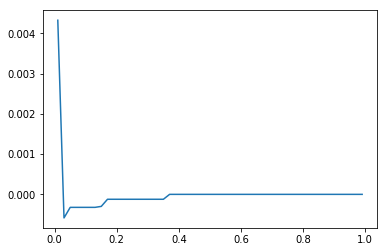

best threshold = 0.01
best mcc = 0.004323265215548622
>>Execution Time -> 0:13


In [10]:
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

start = datetime.now()

thresholds = np.linspace(0.01,0.99,50)
y_pred = clf.best_estimator_.predict_proba(X_test.values)[:,1]
mcc = np.array([metrics.matthews_corrcoef(y_test.values, y_pred>thr) for thr in thresholds])
plt.plot(thresholds, mcc)
plt.show()

best_thr = thresholds[mcc.argmax()]
print("best threshold = {}".format(best_thr))
print("best mcc = {}".format(mcc.max()))

delta = int((datetime.now() - start).total_seconds())
print(">>Execution Time -> {}:{:02}".format(int(delta/60), int(delta % 60)))

In [11]:
# 特徴量の表示
for i in range(0, X_train.shape[1]):
    print("{}:{}".format(X_train.columns[i], clf.best_estimator_.feature_importances_[i]))


L1_S25_D2713:89
L1_S25_D2518:38
L1_S25_D2505:154
L1_S25_D2497:58
L1_S24_D1368:197


# 全訓練データを用いて再学習

In [14]:
start = datetime.now()
clf_all = lgb.LGBMClassifier(random_state=1,n_jobs=-1,verbose=2, max_depth=clf.best_params_['max_depth'], num_leaves=clf.best_params_['num_leaves'])
clf_all.fit(X, y.values.ravel())
print(">>Execution Time -> {}:{:02}".format(int(delta/60), int(delta % 60)))

>>Execution Time -> 0:13


# テストデータを用いて予測

In [19]:
start = datetime.now()
reader_test_date = pd.read_csv("../test_date.csv",chunksize=CHUNK_SIZE)

#分割して読み込み
loop = 0
for df_chunk_test_date in reader_test_date:
        
    df_test_id_chunk = df_chunk_test_date['Id']

    df_date_features_chunk = df_chunk_test_date.loc[:, date_features]  
   
    ##予測
    ary_test_chunk_pred = clf_all.predict_proba(df_date_features_chunk.values)[:,1]
    y_submit = ary_test_chunk_pred > best_thr

    df_test_chunk_pred = pd.DataFrame({'Id':df_test_id_chunk.values, 'Response':y_submit})
    
    if loop == 0:
        df_test_pred = df_test_chunk_pred
    else:
        df_test_pred = pd.concat([df_test_pred, df_test_chunk_pred])
    
    print("loop : {} / Rows = {}".format(loop, len(df_test_pred.index)))
    
    loop = loop + 1

df_test_pred['Response'] = df_test_pred.Response.astype('bool')
df_test_pred.head()

loop : 0 / Rows = 10000
loop : 1 / Rows = 20000
loop : 2 / Rows = 30000
loop : 3 / Rows = 40000
loop : 4 / Rows = 50000
loop : 5 / Rows = 60000
loop : 6 / Rows = 70000
loop : 7 / Rows = 80000
loop : 8 / Rows = 90000
loop : 9 / Rows = 100000
loop : 10 / Rows = 110000
loop : 11 / Rows = 120000
loop : 12 / Rows = 130000
loop : 13 / Rows = 140000
loop : 14 / Rows = 150000
loop : 15 / Rows = 160000
loop : 16 / Rows = 170000
loop : 17 / Rows = 180000
loop : 18 / Rows = 190000
loop : 19 / Rows = 200000
loop : 20 / Rows = 210000
loop : 21 / Rows = 220000
loop : 22 / Rows = 230000
loop : 23 / Rows = 240000
loop : 24 / Rows = 250000
loop : 25 / Rows = 260000
loop : 26 / Rows = 270000
loop : 27 / Rows = 280000
loop : 28 / Rows = 290000
loop : 29 / Rows = 300000
loop : 30 / Rows = 310000
loop : 31 / Rows = 320000
loop : 32 / Rows = 330000
loop : 33 / Rows = 340000
loop : 34 / Rows = 350000
loop : 35 / Rows = 360000
loop : 36 / Rows = 370000
loop : 37 / Rows = 380000
loop : 38 / Rows = 390000
loop 

,Id,Response
0,1,False
1,2,False
2,3,False
3,5,False
4,8,False


In [18]:
df_chunk_test_date.head()

,Id,L0_S0_D1,L0_S0_D3,L0_S0_D5,L0_S0_D7,L0_S0_D9,L0_S0_D11,L0_S0_D13,L0_S0_D15,L0_S0_D17,L0_S0_D19,L0_S0_D21,L0_S0_D23,L0_S1_D26,L0_S1_D30,L0_S2_D34,L0_S2_D38,L0_S2_D42,L0_S2_D46,L0_S2_D50,L0_S2_D54,L0_S2_D58,L0_S2_D62,L0_S2_D66,L0_S3_D70,L0_S3_D74,L0_S3_D78,L0_S3_D82,L0_S3_D86,L0_S3_D90,L0_S3_D94,L0_S3_D98,L0_S3_D102,L0_S4_D106,L0_S4_D111,L0_S5_D115,L0_S5_D117,L0_S6_D120,L0_S6_D124,L0_S6_D127,L0_S6_D130,L0_S6_D134,L0_S7_D137,L0_S7_D139,L0_S7_D140,L0_S7_D141,L0_S7_D143,L0_S8_D145,L0_S8_D147,L0_S8_D148,L0_S8_D150,L0_S9_D152,L0_S9_D157,L0_S9_D162,L0_S9_D167,L0_S9_D172,L0_S9_D177,L0_S9_D182,L0_S9_D187,L0_S9_D192,L0_S9_D197,L0_S9_D202,L0_S9_D207,L0_S9_D212,L0_S10_D216,L0_S10_D221,L0_S10_D226,L0_S10_D231,L0_S10_D236,L0_S10_D241,L0_S10_D246,L0_S10_D251,L0_S10_D256,L0_S10_D261,L0_S10_D266,L0_S10_D271,L0_S10_D276,L0_S11_D280,L0_S11_D284,L0_S11_D288,L0_S11_D292,L0_S11_D296,L0_S11_D300,L0_S11_D304,L0_S11_D308,L0_S11_D312,L0_S11_D316,L0_S11_D320,L0_S11_D324,L0_S11_D328,L0_S12_D331,L0_S12_D333,L0_S12_D335,L0_S12_D337,L0_S12_D339,L0_S12_D341,L0_S12_D343,L0_S12_D345,L0_S12_D347,L0_S12_D349,L0_S12_D351,L0_S12_D353,L0_S13_D355,L0_S13_D357,L0_S14_D360,L0_S14_D364,L0_S14_D368,L0_S14_D372,L0_S14_D376,L0_S14_D380,L0_S14_D384,L0_S14_D388,L0_S14_D392,L0_S15_D395,L0_S15_D398,L0_S15_D401,L0_S15_D404,L0_S15_D407,L0_S15_D410,L0_S15_D413,L0_S15_D416,L0_S15_D419,L0_S16_D423,L0_S16_D428,L0_S17_D432,L0_S17_D434,L0_S18_D437,L0_S18_D441,L0_S18_D444,L0_S18_D447,L0_S18_D451,L0_S19_D454,L0_S19_D456,L0_S19_D457,L0_S19_D458,L0_S19_D460,L0_S20_D462,L0_S20_D464,L0_S20_D465,L0_S20_D467,L0_S21_D469,L0_S21_D474,L0_S21_D479,L0_S21_D484,L0_S21_D489,L0_S21_D494,L0_S21_D499,L0_S21_D504,L0_S21_D509,L0_S21_D514,L0_S21_D519,L0_S21_D524,L0_S21_D529,L0_S21_D534,L0_S21_D539,L0_S22_D543,L0_S22_D548,L0_S22_D553,L0_S22_D558,L0_S22_D563,L0_S22_D568,L0_S22_D573,L0_S22_D578,L0_S22_D583,L0_S22_D588,L0_S22_D593,L0_S22_D598,L0_S22_D603,L0_S22_D608,L0_S22_D613,L0_S23_D617,L0_S23_D621,L0_S23_D625,L0_S23_D629,L0_S23_D633,L0_S23_D637,L0_S23_D641,L0_S23_D645,L0_S23_D649,L0_S23_D653,L0_S23_D657,L0_S23_D661,L0_S23_D665,L0_S23_D669,L0_S23_D673,L1_S24_D677,L1_S24_D681,L1_S24_D685,L1_S24_D689,L1_S24_D693,L1_S24_D697,L1_S24_D702,L1_S24_D707,L1_S24_D712,L1_S24_D716,L1_S24_D721,L1_S24_D725,L1_S24_D730,L1_S24_D735,L1_S24_D739,L1_S24_D743,L1_S24_D748,L1_S24_D753,L1_S24_D758,L1_S24_D763,L1_S24_D768,L1_S24_D772,L1_S24_D777,L1_S24_D782,L1_S24_D787,L1_S24_D792,L1_S24_D797,L1_S24_D801,L1_S24_D804,L1_S24_D807,L1_S24_D809,L1_S24_D811,L1_S24_D813,L1_S24_D815,L1_S24_D818,L1_S24_D822,L1_S24_D826,L1_S24_D831,L1_S24_D836,L1_S24_D841,L1_S24_D846,L1_S24_D850,L1_S24_D854,L1_S24_D859,L1_S24_D864,L1_S24_D869,L1_S24_D874,L1_S24_D879,L1_S24_D884,L1_S24_D889,L1_S24_D894,L1_S24_D899,L1_S24_D904,L1_S24_D909,L1_S24_D913,L1_S24_D917,L1_S24_D922,L1_S24_D927,L1_S24_D932,L1_S24_D937,L1_S24_D941,L1_S24_D945,L1_S24_D950,L1_S24_D955,L1_S24_D960,L1_S24_D965,L1_S24_D970,L1_S24_D975,L1_S24_D980,L1_S24_D985,L1_S24_D990,L1_S24_D995,L1_S24_D999,L1_S24_D1001,L1_S24_D1003,L1_S24_D1005,L1_S24_D1007,L1_S24_D1009,L1_S24_D1011,L1_S24_D1013,L1_S24_D1015,L1_S24_D1018,L1_S24_D1023,L1_S24_D1028,L1_S24_D1033,L1_S24_D1038,L1_S24_D1043,L1_S24_D1048,L1_S24_D1053,L1_S24_D1058,L1_S24_D1062,L1_S24_D1066,L1_S24_D1070,L1_S24_D1074,L1_S24_D1077,L1_S24_D1081,L1_S24_D1085,L1_S24_D1089,L1_S24_D1092,L1_S24_D1096,L1_S24_D1100,L1_S24_D1104,L1_S24_D1108,L1_S24_D1112,L1_S24_D1116,L1_S24_D1120,L1_S24_D1124,L1_S24_D1128,L1_S24_D1132,L1_S24_D1135,L1_S24_D1138,L1_S24_D1141,L1_S24_D1143,L1_S24_D1146,L1_S24_D1149,L1_S24_D1151,L1_S24_D1153,L1_S24_D1155,L1_S24_D1158,L1_S24_D1163,L1_S24_D1168,L1_S24_D1171,L1_S24_D1173,L1_S24_D1175,L1_S24_D1178,L1_S24_D1182,L1_S24_D1186,L1_S24_D1190,L1_S24_D1194,L1_S24_D1199,L1_S24_D1204,L1_S24_D1209,L1_S24_D1214,L1_S24_D1218,L1_S24_D1222,L1_S24_D1227,L1_S24_D1232,L1_S24_D1237,L1_S24_D1242,L1_S24_D1247,L1_S24_D1252,L1_S24_D1257,L1_S24_D1262,L1_S24_D1267,L1_S24_D1272,L1_S24_D1277,L1_S24_D1281,L1_S24_D1285,L1_S24_D1290,L1_S24_D1295,L1_S24_D13

In [20]:
##CSV出力
y_submit = df_test_pred
type(y_submit)
y_submit.to_csv("submit_date_features.csv", columns=['Id', 'Response'], index=False)

In [21]:
y_submit.Response.sum()

3733

In [ ]:
df_test_chunk.head()